In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from matplotlib import rcParams
from scipy.stats import linregress

%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [15]:
df = pd.read_excel("/Users/zuba818/Downloads/Stock_Data/stock-all.xls", sheetname='stock')

In [72]:
df_stock_1 = df[df.stock_id == 1].copy()
df_stock_11 = df[df.stock_id == 11].copy()
df_stock_13 = df[df.stock_id == 13].copy()
df_stock_23 = df[df.stock_id == 23].copy()
df_stock_293 = df[df.stock_id == 293].copy()

In [24]:
df.isnull().any()

stock_id             int64
tdate       datetime64[ns]
open               float64
close              float64
high               float64
low                float64
volume               int64
dtype: object

In [26]:
df.dtypes

stock_id             int64
tdate       datetime64[ns]
open               float64
close              float64
high               float64
low                float64
volume               int64
dtype: object

In [28]:
df.describe()

,stock_id,open,close,high,low,volume
count,11068.000000,11068.000000,11068.000000,11068.000000,11068.000000,1.106800e+04
mean,195.628117,46.638477,46.623703,47.052904,46.183871,2.094519e+07
std,308.090381,36.508613,36.492517,36.817295,36.174758,6.183043e+07
min,1.000000,1.110000,1.110000,1.160000,1.100000,0.000000e+00
25%,11.000000,13.587500,13.550000,13.650000,13.450000,2.379075e+06
50%,13.000000,44.000000,43.900000,44.400000,43.425000,4.636750e+06
75%,293.000000,80.750000,80.750000,81.500000,80.000000,9.231050e+06
max,857.000000,150.000000,150.000000,153.500000,149.000000,4.117606e+09


Text(0.5,1,'closing price of stock 1')

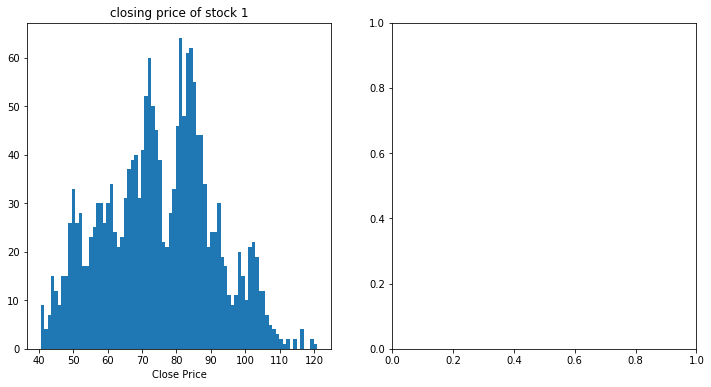

In [34]:
fig = plt.figure(figsize=(12,6))
sqft = fig.add_subplot(121)
cost = fig.add_subplot(122)

sqft.hist(df_stock_1.close, bins=80)
sqft.set_xlabel('Close Price')
sqft.set_title("closing price of stock 1")



In [38]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [44]:
m = ols('close ~ open',df_stock_1).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  close   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 3.235e+05
Date:                Wed, 21 Mar 2018   Prob (F-statistic):               0.00
Time:                        15:54:25   Log-Likelihood:                -2972.8
No. Observations:                1856   AIC:                             5950.
Df Residuals:                    1854   BIC:                             5961.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2057      0.134      1.533      0.1

In [48]:
m = ols('close ~ open + high + low + volume',df_stock_1).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  close   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.709e+05
Date:                Wed, 21 Mar 2018   Prob (F-statistic):               0.00
Time:                        15:55:38   Log-Likelihood:                -1340.8
No. Observations:                1856   AIC:                             2692.
Df Residuals:                    1851   BIC:                             2719.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1375      0.061      2.272      0.0

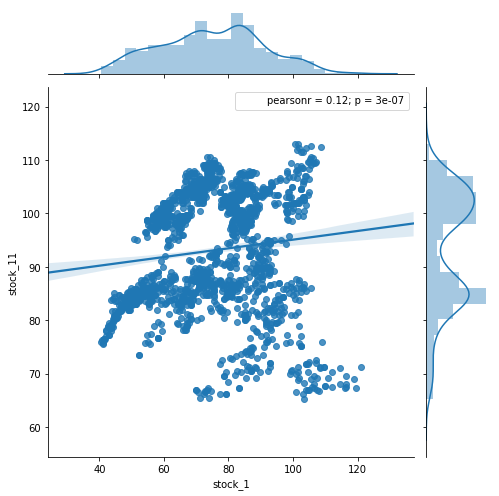

In [137]:
sns.jointplot(x="stock_1",y="stock_11",data=stocks, kind = 'reg',fit_reg= True, size = 7)
plt.show()
#we can see the price only goes high

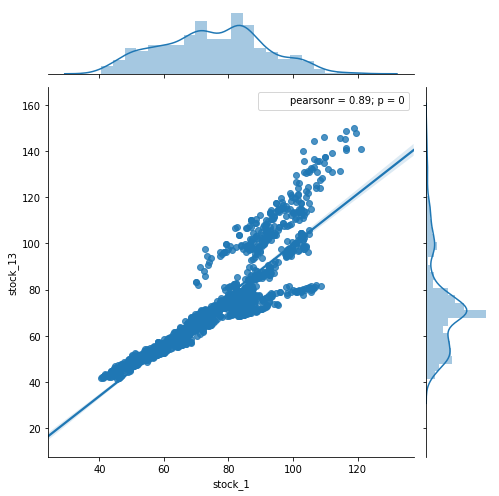

In [141]:
sns.jointplot(x="stock_1",y="stock_13",data=stocks, kind = 'reg',fit_reg= True, size = 7)
plt.show()
#we can see the price only goes high

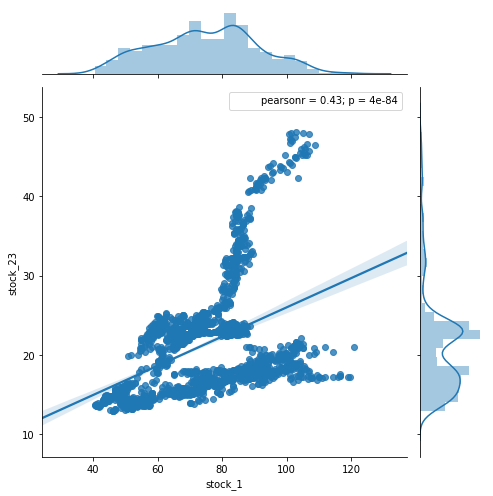

In [143]:
sns.jointplot(x="stock_1",y="stock_23",data=stocks, kind = 'reg',fit_reg= True, size = 7)
plt.show()
#we can see the price only goes high

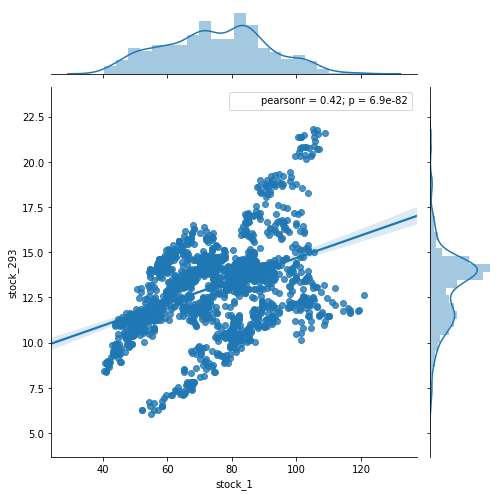

In [146]:
sns.jointplot(x="stock_1",y="stock_293",data=stocks, kind = 'reg',fit_reg= True, size = 7)
plt.show()
#we can see the price only goes high

In [53]:
### Clustering ###

In [55]:
import sklearn
from sklearn import cluster

In [153]:
s1 = df_stock_1.set_index('tdate')
s11 = df_stock_11.set_index('tdate')
s13 = df_stock_13.set_index('tdate')
s23 = df_stock_23.set_index('tdate')
s293 = df_stock_293.set_index('tdate')

stocks = pd.DataFrame({"stock_1": s1["close"],
                       "stock_11": s11["close"],
                       "stock_13": s13["close"],
                       "stock_23": s23["close"],
                       "stock_293": s293["close"]
                      
})
stocks.head()

,stock_1,stock_11,stock_13,stock_23,stock_293
tdate,,,,,
2000-01-04,98.00,86.50,115.0,21.15,13.10
2000-01-05,91.25,81.75,107.0,19.50,12.30
2000-01-06,86.75,76.75,102.0,18.40,12.95
2000-01-07,88.50,81.50,103.0,19.45,13.50
2000-01-10,89.25,80.75,106.0,20.40,14.30


In [154]:
stocks.columns = ['stock_1','stock_11','stock_13','stock_23']
plt.scatter(stocks.stock_1, stocks.stock_11, stocks.stock_13, stocks.stock_23)
plt.title('Closing Price stock 1,11,13,23 Scatterplot')
plt.xlabel('close')
plt.ylabel("close")



ValueError: Length mismatch: Expected axis has 5 elements, new values have 4 elements

In [110]:
stock = np.array(stocks)
k = 4
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(stock)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

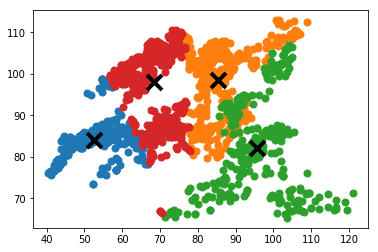

In [112]:
for i in range(k):
    # select only data observations with cluster label == i
    ds = stock[np.where(labels==i)]
    # plot the data observations
    plt.plot(ds[:,0],ds[:,1],'o', markersize=7)
    # plot the centroids
    lines = plt.plot(centroids[i,0],centroids[i,1],'kx')
    # make the centroid x's bigger
    plt.setp(lines,ms=15.0)
    plt.setp(lines,mew=4.0)
plt.show()

In [155]:
s1 = df_stock_1.set_index('tdate')
s293 = df_stock_293.set_index('tdate')

stocks = pd.DataFrame({"stock_1": s1["close"],
                        "stock_293": s293["close"],
                      
})
stocks.head()

,stock_1,stock_293
tdate,,
2000-01-04,98.00,13.10
2000-01-05,91.25,12.30
2000-01-06,86.75,12.95
2000-01-07,88.50,13.50
2000-01-10,89.25,14.30


Text(0,0.5,'close293')

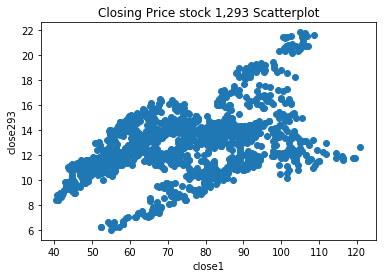

In [156]:
stocks.columns = ['stock_1','stock_293']
plt.scatter(stocks.stock_1, stocks.stock_293)
plt.title('Closing Price stock 1,293 Scatterplot')
plt.xlabel('close1')
plt.ylabel("close293")


In [157]:
stock = np.array(stocks)
k = 2
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(stock)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

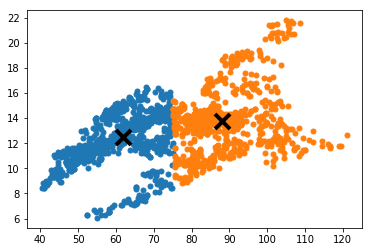

In [194]:
for i in range(k):
    # select only data observations with cluster label == i
    ds = stock[np.where(labels==i)]
    # plot the data observations
    plt.plot(ds[:,0],ds[:,1],'.', markersize=10)
    # plot the centroids
    lines = plt.plot(centroids[i,0],centroids[i,1],'kx')
    # make the centroid x's bigger
    plt.setp(lines,ms=15.0)
    plt.setp(lines,mew=4.0)

plt.show()
